In [9]:
import numpy as np
import pandas as pd
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LogisticRegression
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
bank=pd.read_csv('C:/Users/DELL/Downloads/bank-full.csv', sep=';')

In [24]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [28]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [29]:
import seaborn as sn
import matplotlib.pyplot as plt

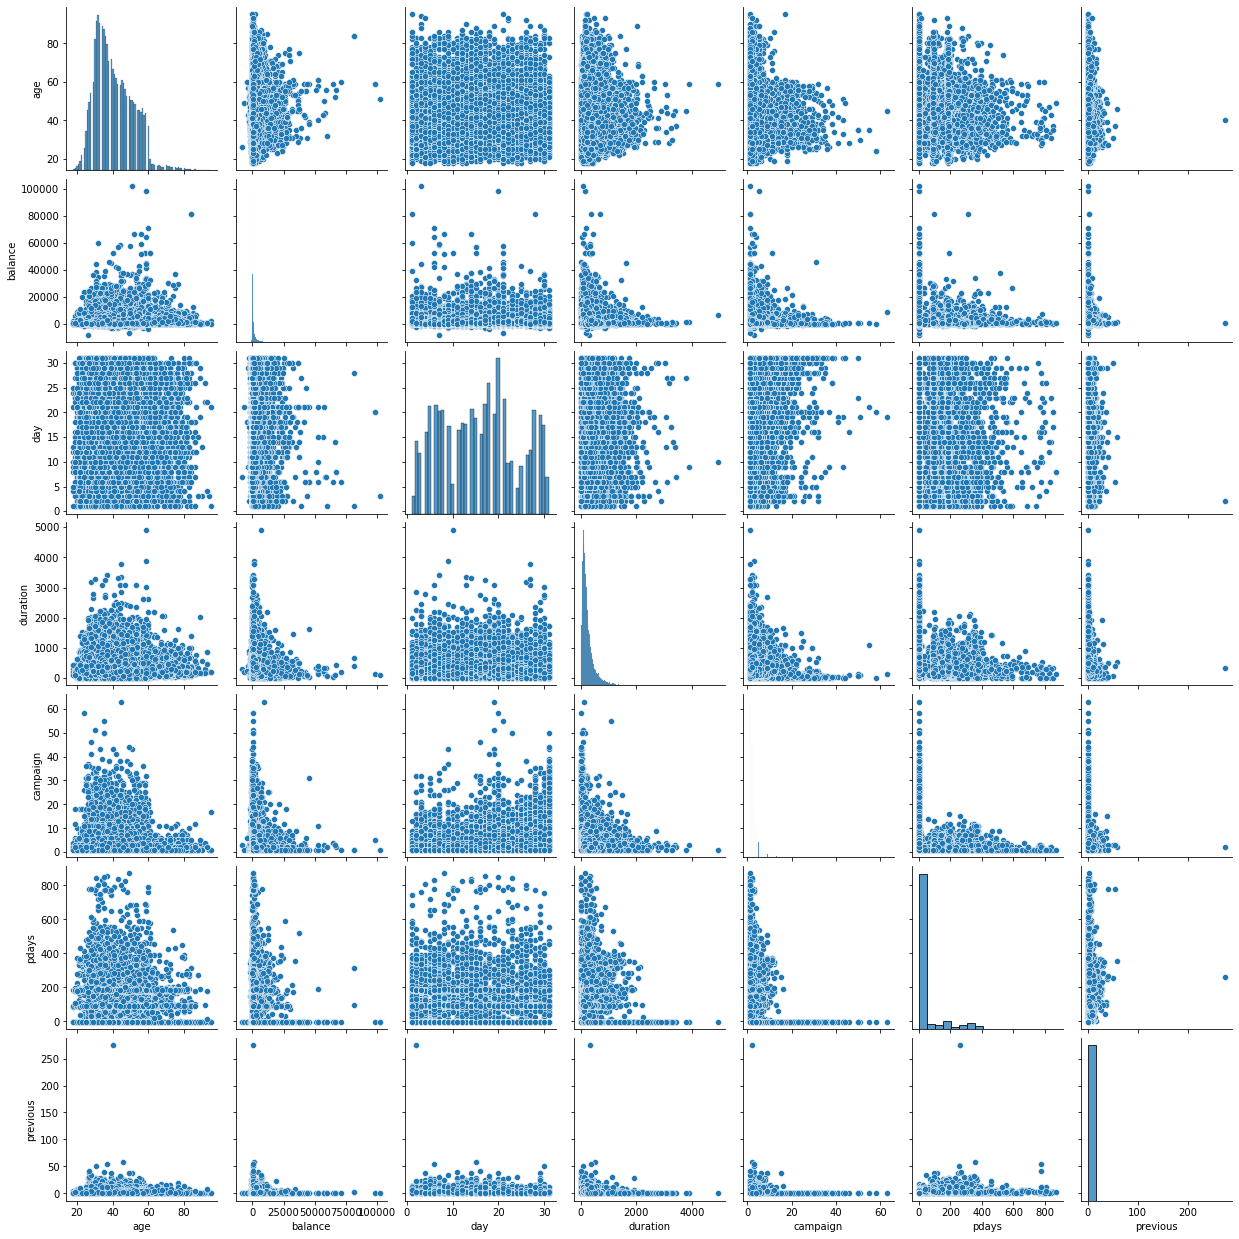

In [30]:
sn.pairplot(bank)

In [34]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [35]:
count_no_sub = len(bank[bank['y']=="no"])
count_sub = len(bank[bank['y']=="yes"])

In [36]:
(count_sub / (count_sub + count_no_sub))*100

11.698480458295547

Text(0, 0.5, 'Frequency of subscribtion')

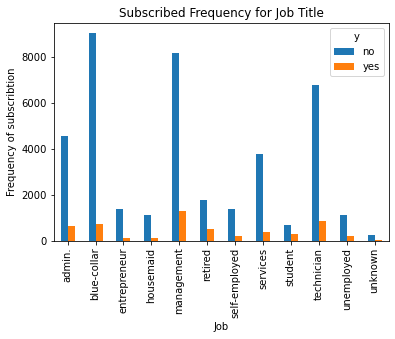

In [37]:
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Subscribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of subscribtion')

Text(0, 0.5, 'Proportion of Customers')

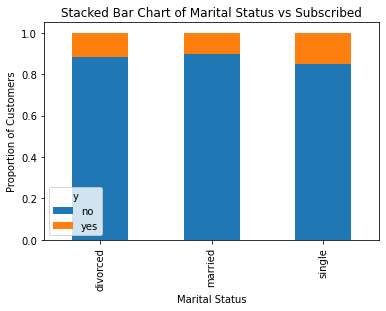

In [38]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

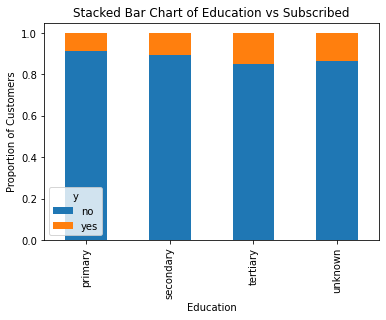

In [40]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

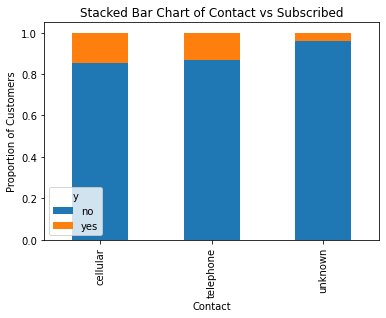

In [41]:
table=pd.crosstab(bank.contact,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contact vs Subscribed')
plt.xlabel('Contact')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

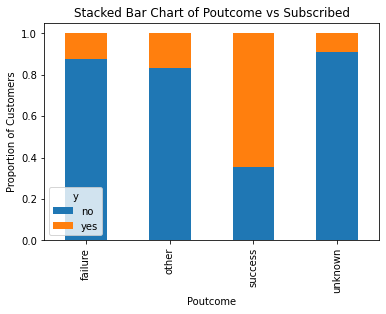

In [42]:
table=pd.crosstab(bank.poutcome,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Poutcome vs Subscribed')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency')

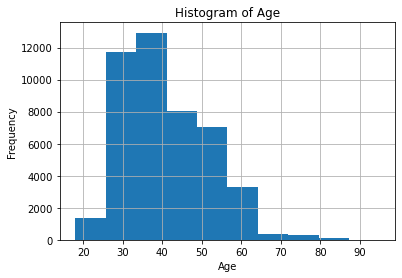

In [43]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# most of the coustomer are in age between 20 to 50 years

Text(0, 0.5, 'Frequency of Subscribed')

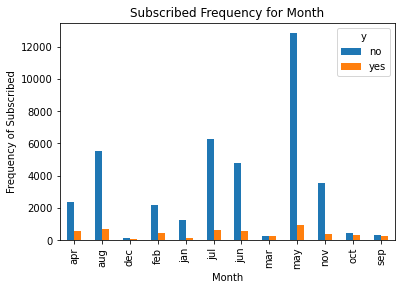

In [44]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Subscribed Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subscribed')

# Month be a good predictor of the outcome variable


Text(0, 0.5, 'Frequency')

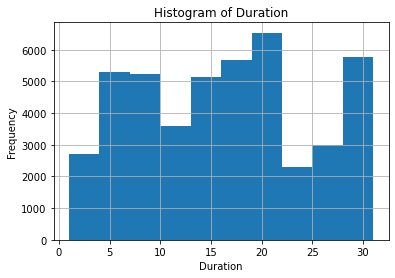

In [45]:
bank.day.hist()
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')

In [46]:
bank['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

# Data is somewhat evenly distributed on whether the client has House or not

In [47]:
bank['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

# However majority of the client do not have loan

#  Logistic Regression Model

In [48]:
bank['default'] = bank['default'].map({'yes': 1, 'no': 0})
bank['housing'] = bank['housing'].map({'yes': 1, 'no': 0})
bank['loan'] = bank ['loan'].map({'yes': 1, 'no': 0})
bank ['y'] = bank['y'].map({'yes': 1, 'no': 0})

In [49]:
bank = pd.get_dummies(bank, columns=['job'])
bank = pd.get_dummies(bank, columns=['marital'])
bank = pd.get_dummies(bank, columns=['education'])
bank = pd.get_dummies(bank, columns=['month'])

In [50]:
bank = bank.drop(['contact', 'poutcome'], axis=1)

In [51]:
X = bank.loc[:, bank.columns != 'y']
y = bank.loc[:, bank.columns == 'y']

In [54]:
logreg=LogisticRegression()

In [55]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\PYTHON\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\PYTHON\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\PYTHON\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

[False  True False  True  True False False False False False False False
 False  True False  True False False  True False False False False  True
 False  True False False  True  True  True  True False  True  True  True
  True  True  True  True  True]
[18  1 22  1  1 20 19  9 21 10 17  7  4  1 14  1 13 12  1 15  5  3  8  1
 16  1  2 11  1  1  1  1  6  1  1  1  1  1  1  1  1]


# As per RFE analysis we can exclude all the variables which are False

In [56]:
X = bank[['default', 'housing', 'loan', 'job_housemaid', 'job_retired', 'job_student', 'marital_married', 'education_primary', 'education_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']]
y = bank.loc[:, bank.columns == 'y']

In [59]:
import statsmodels.api as sm
logit=sm.Logit(y,X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.329035
         Iterations 7


In [60]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45191
Method:                           MLE   Df Model:                           19
Date:                Sat, 05 Mar 2022   Pseudo R-squ.:                 0.08823
Time:                        13:21:57   Log-Likelihood:                -14876.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
default              -0.3787      0.147     -2.583      0.010      -0.666      -0.091
housing              -0.8781      0.032    -27.113      0.000      -0.942      -0.815
loan                 -0.5724      0.052    -11.078      0.000      -0.674      -0.471
job_housemaid        -0.3289      0.107     -3.063      0.002      -0.539      -0.118
job_retired           0.4625      0.060      7.766      0.000       0.346       0.579
job_student           0.3142      0.083      3.793      0.000       0.152       0.477
marital_married      -0.4290      0.030    -14.327      0.000      -0.488      -0.370
education_primary    -0.4093      0.050     -8.128      0.000      -0.508      -0.311
education_unknown    -0.1917      0.076     -2.526      0.012      -0.340      -0.043
month_aug            -1.6473      0.044    -37.054      0.000      -1.734      -1.560
month_dec             0.2455      0.143      1.721      0.085      -0.034       0.525
month_feb            -1.0118      0.056    -18.069      0.000      -1.122      -0.902
month_jan            -1.6548      0.091    -18.198      0.000      -1.833      -1.477
month_jul            -1.4992      0.048    -31.550      0.000      -1.592      -1.406
month_jun            -1.4979      0.050    -30.193      0.000      -1.595      -1.401
month_mar             0.5074      0.097      5.253      0.000       0.318       0.697
month_may            -1.5674      0.044    -35.900      0.000      -1.653      -1.482
month_nov            -1.4004      0.057    -24.622      0.000      -1.512      -1.289
month_oct             0.1817      0.079      2.290      0.022       0.026       0.337
month_sep             0.2701      0.088      3.053      0.002       0.097       0.443
=====================================================================================
"""

In [61]:
logreg.fit(X, y)

C:\PYTHON\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [62]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.88


In [63]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     39922
           1       0.49      0.09      0.15      5289

    accuracy                           0.88     45211
   macro avg       0.69      0.54      0.54     45211
weighted avg       0.84      0.88      0.84     45211



In [64]:
confusion_matrix(y, y_pred)

array([[39455,   467],
       [ 4833,   456]], dtype=int64)

# conclusion
# 39455+456 are corret prediction and 4833+467 are incorret predictions
# Accuracy is 84%